###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018 parts of this notebook are from ([this Jupyter notebook](https://nbviewer.jupyter.org/github/krischer/seismo_live/blob/master/notebooks/Computational%20Seismology/Wave%20Propagation%20%26%20Analytical%20Solutions/Greens_function_acoustic_1-3D.ipynb)) by Kristina Garina, Ashim Rijal and Heiner Igel ([@heinerigel](https://github.com/heinerigel)) which is a supplemenatry material to the book [Computational Seismology: A Practical Introduction](http://www.computational-seismology.org/),  additional modifications by D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'style/custom.css'
HTML(open(css_file, "r").read())

# Computation of Green's functions and seismograms for the (visco)acoustic wave equation

In the previous lessons we derived the equations of motion to describe wave propagation in 3D, 2D and 1D elastic and acoustic media. Before solving the underlying partial differential equations numerically using finite-differences (FD), we should estimate some analytical solutions. 

This is not only useful to check if the FD codes contain any bugs, but also to get an idea of the accuracy of the numerical solution compared to the analytical.

Beside solutions for the acoustic wave equation, we can easily compute Green's functions for visco-acoustic media by introducing complex P-waves velocities in the frequency domain.

## 3D Green's function  

The **Green's function for a 3D homogeneous acoustic medium** $\mathbf{G_3(x,t;x_s,t_s)}$ is governed by

\begin{equation}
\frac{\partial^2 G_3}{\partial t^2} - V_{p0}^2 \biggl(\frac{\partial^2 G_3}{\partial x^2} + \frac{\partial^2 G_3}{\partial y^2} +\frac{\partial^2 G_3}{\partial z^2} \biggl)= \delta(t-t_s) \delta(x-x_s) \delta(y-y_s) \delta(z-z_s) \nonumber
\end{equation}

By Fourier transformation from space-time to wavenumber-frequency domain and vice versa, we can estimate the following analytical solution for a constant P-wave velocity $V_{p0}$

\begin{equation}
G_3(x,y,z,t) = \dfrac{1}{4 \pi V_{p0}^2 r}\delta\biggl((t-t_s)-\frac{r}{V_{p0}}\biggr) \tag{1} 
\end{equation}

with the source-receiver distance (offset)

$r = \sqrt{(x-x_s)^2+(y-y_s)^2+(z-z_s)^2}$

So the 3D Green's function for the homogeneous acoustic medium is a Delta distribution delayed by the traveltime between source and receiver. For the numerical computation of the 3D Green's function, we have to approximate the  $\delta-$function. An example is the boxcar function

$$
\delta_{bc}(t) = \left\{
\begin{array}{ll}
	1/dt &|x|\leq dt/2 \\
	0 &\text{elsewhere} 	
\end{array}
\right.
$$

fulfilling the properties of the $\delta$ function as  $dt \rightarrow\; 0$. This function is used to properly scale the source term to obtain correct absolute amplitudes.

Let 's compute and visualize the 3D Green's function for a homogeneous acoustic medium with a P-wave velocity $V_{p0} = 2000\; m/s$ and a source-receiver distance $r = 1.5\; m$ ...

In [2]:
# Import Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define parameters
vp0 = 2000.     # P-wave velocity [m/s]
r = 1.5         # receiver distance from source
tmax = 2e-3     # length of seismogram [s]
nt = 3000       # number of time samples
dt = tmax/nt    # time increment
ts = 0          # source time

# Define time vector
time = np.arange(0,tmax,dt)

# Acquisition geometry
xs=0            # coordinates of source
ys=0
zs=0

xr=r            # coordinates of receiver
yr=0
zr=0

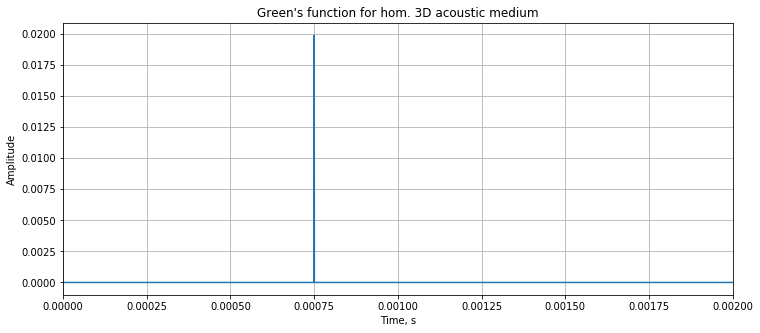

In [4]:
# Calculation of 3D Green's function
G3=np.zeros(nt)                                # initialization G with zeros

r=np.sqrt((xs-xr)**2+(ys-yr)**2+(zs-zr)**2)    # defining offset
amp=1./(4*np.pi*(vp0**2)*r)                    # defining amplitudes
t_arr=ts+(r/vp0)                               # time arrival
i_arr=t_arr/dt
b=int(i_arr)
G3[b]= amp/dt

# Plotting Green's function in 3D
plt.figure(figsize=(12,5))
plt.plot(time, G3)
plt.title("Green's function for hom. 3D acoustic medium" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.xlim((0, tmax))
plt.grid()
plt.show()

## Computation of time domain seismograms

In field data applications we can not excitate a source time function like a delta distribution, which would have a perfect white spectrum (all frequencies are excitated at once).

Instead we have to rely on band-limited source signals. Seismograms for an arbritary source wavelet can be computed from the Green's function. In the following example, the source wavelet consists of the first derivative of the Gaussian.

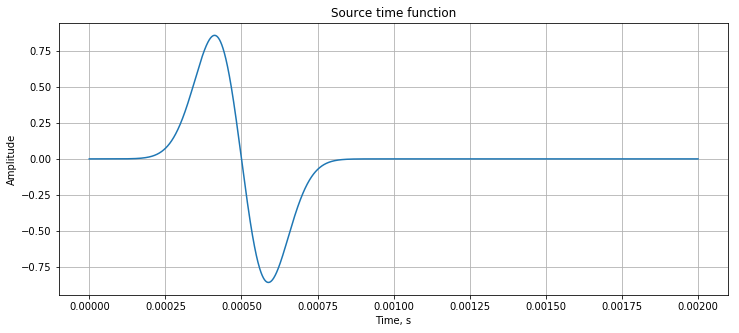

In [5]:
# Defining source time function
f0 = 2e3         # Frequency (Hz)
p=1./f0          # period
t0 = p/dt        # defining t0
sigma=4./p      

# Initialization of source-time function
src=np.zeros(nt) 
source=np.zeros(nt)

# Initialization of first derivative of gaussian
for it in range(nt):
    t=(it-t0)*dt
    src[it]=-2*sigma*t*np.exp(-(sigma*t)**2)
source[0:nt]=src

# Plotting of source time function
plt.figure(figsize=(12,5))
plt.plot(time, src)
plt.title('Source time function')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

##### Excerise

Compute seismograms $G_{seis}(x,t)$ for the homogenoues 3D acoustic medium, by a convolution of the Green's function $G(x,t;x_s,t_s)$ with the source wavelet $s(t)$:

$$G_{seis}(x,t) = G(x,t;x_s,t_s) * s(t)$$

Plot the resulting seismograms together with the Green's function solutions.

*Hints:* 
* Use the NumPy function np.convolve. 
* How could you check if your implemented convolution is correct?

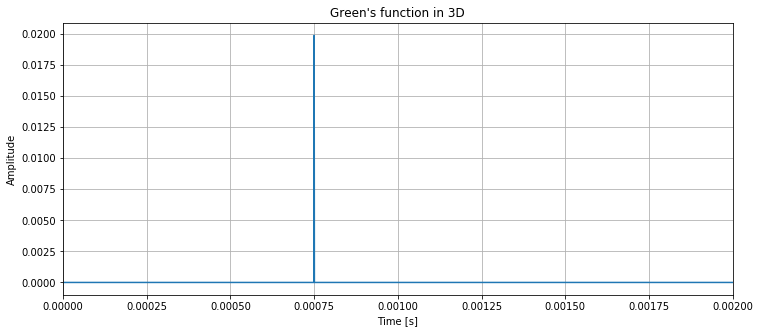

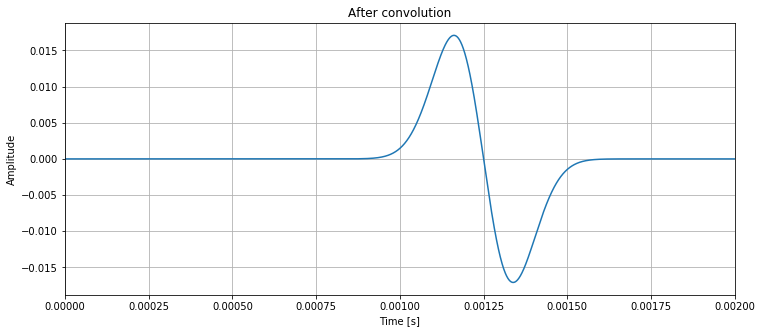

In [6]:
# Convolution of Green's function with the 1st derivative of a Gaussian
G3_seis = np.convolve(source,G3)
G3_seis = G3_seis[:nt] # limit seismogram to positive time-lags

# Plotting Green's function in 3D
plt.figure(figsize=(12,5))
plt.plot(time, G3)
plt.title("Green's function in 3D" )
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim((0, tmax))
plt.grid()
plt.show()

# Plotting convolved Green's function in 1D
plt.figure(figsize=(12,5))
plt.plot(time, G3_seis)
plt.title('After convolution')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim (0, tmax)
plt.grid()
plt.show()

## Computation of time domain seismograms from acoustic Greens function in frequency domain

Instead of computing the Greens function in time-domain, we can also define it in the frequency domain and obtain the time-domain result by an inverse Fourier transform. From eq. (1), we can easily derive the Greens function in frequency domain:

\begin{equation}
\hat{G}_3(x,y,z,\omega) = \dfrac{exp(-i\omega\frac{r}{V_{p0}})}{4 \pi V_{p0}^2 r} \tag{2} 
\end{equation}

Let 's implement the frequency domain solution, inverse fourier transform it and compare it with the time domain solution ...

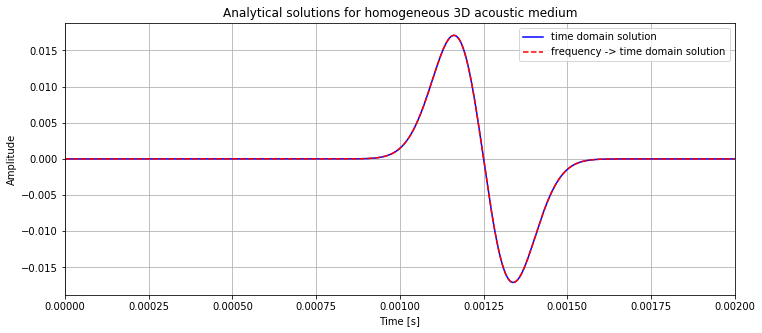

In [7]:
# Fourier transform source signal
Source = np.fft.fft(source)
    
# Estimate frequencies freq [Hz]   
freq = np.fft.fftfreq(nt, d=dt)

# circular frequencies w [rad/s]
w = 2. * np.pi * freq 

# Define frequency domain Greens function
G3fd = np.exp(-1j*w*r/vp0) / (4. * np.pi * vp0**2 * r)

# Convolve Green's function with source wavelet in frequency domain
G3fd_seis = Source * G3fd
#G3fd_seis = G3fd

# Obtain time domain solution by inverse FFT
G3td_seis = np.fft.ifft(G3fd_seis)
G3td_seis = np.real(G3td_seis) / dt

# Compare time domain seismogram with time domain seismogram from frequency domain
plt.figure(figsize=(12,5))
plt.plot(time, G3_seis, 'b-', label='time domain solution')
plt.plot(time, G3td_seis, 'r--', label='frequency -> time domain solution')
plt.title("Analytical solutions for homogeneous 3D acoustic medium" )
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim((0, tmax))
plt.grid()
plt.legend()
plt.show()

Notice that both approaches deliver the same analytical time domain solutions.

## Computation of time domain seismograms from visco-acoustic Greens function in frequency domain

With the definition of the Greens function in frequency domain and a code which can compute the corresponding time-domain seismograms, we can now easily introduce visco-acoustic effects, by using complex P-wave velocities. A common approach is the Kolsky-Futterman model ([Kolsky 1956](https://www.tandfonline.com/doi/abs/10.1080/14786435608238144), [Futterman 1962](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JZ067i013p05279)):

\begin{equation}
V_{p0}^{c}(\omega) = V_{p0} \biggl[1 - \frac{1}{\pi Q} \log\biggl(\biggl|\frac{\omega}{\omega_r}\biggr|\biggr) + i \frac{sgn(\omega)}{2 Q}\biggr] \tag{3}
\end{equation}

with the quality factor $Q$ and a reference frequency $\omega_r$. The second term on the RHS in eq. (3) describes the dispersion introduced by the visco-acoustic medium, the third term damping of the acoustic waves.

Replacing the P-wave velocity $V_{p0}$ by the complex valued P-wave velocity $V_{p0}^{c}(\omega)$ in our previous code, we can compute analytical solutions for a homogeneous visco-acoustic medium ...

In [8]:
def visco_ac(Q):
    
    # Fourier transform source signal
    Source = np.fft.fft(source)
    
    # Estimate frequencies freq [Hz]   
    freq = np.fft.fftfreq(nt, d=dt)

    # circular frequencies w [rad/s]
    w = 2. * np.pi * freq 

    # Define complex P-wave velocity accoring to the Kolsky-Futterman model
    wr = 8e4 # reference frequency
    vpc = vp0 * (1 + (1./(np.pi*Q)) * np.log(np.abs(w/wr)) + 1j * np.sign(w) / (2.*Q))

    # Define frequency domain Greens function
    G3fd = np.exp(-1j*w*r/vpc) / (4. * np.pi * vpc**2 * r)
    G3fd[0] = 0. # set 0 Hz component to zero

    # Convolve Green's function with source wavelet in frequency domain
    G3fd_seis = Source * G3fd
    #G3fd_seis = G3fd

    # Obtain time domain solution by inverse FFT
    G3td_seis = np.fft.ifft(G3fd_seis)
    G3td_seis = np.real(G3td_seis) / dt
    
    return vpc, G3td_seis

In [9]:
# Compute visco-acoustic solutions
vpQ20,Q20 = visco_ac(20.)
vpQ10,Q10 = visco_ac(10.)
vpQ5,Q5 = visco_ac(5.)
vpQ2,Q2 = visco_ac(2.)
vpQ1,Q1 = visco_ac(1.)

C:\Users\daniel_koehn\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\daniel_koehn\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\daniel_koehn\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


Let 's plot the frequency dependency of the P-wave velocity model ...

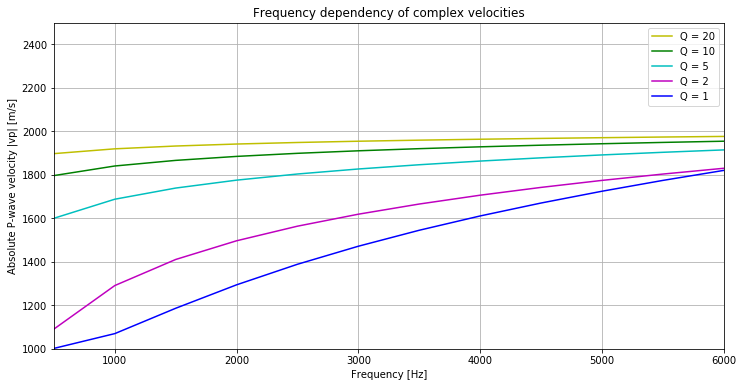

In [10]:
# Compare time domain seismograms and amplitude spectra
plt.figure(figsize=(12,6))

plt.plot(freq[:nt//2], np.abs(vpQ20[:nt//2]), 'y-', label='Q = 20')
plt.plot(freq[:nt//2], np.abs(vpQ10[:nt//2]), 'g-', label='Q = 10')
plt.plot(freq[:nt//2], np.abs(vpQ5[:nt//2]), 'c-', label='Q = 5')
plt.plot(freq[:nt//2], np.abs(vpQ2[:nt//2]), 'm-', label='Q = 2')
plt.plot(freq[:nt//2], np.abs(vpQ1[:nt//2]), 'b-', label='Q = 1')
plt.title("Frequency dependency of complex velocities" )
plt.xlabel("Frequency [Hz]")
plt.ylabel("Absolute P-wave velocity |vp| [m/s]")
plt.xlim((500, 3.*f0))
plt.ylim((1000, 2500))
plt.grid()
plt.legend()

plt.savefig('Visco-acoustic_Green_3D_vel.pdf', bbox_inches='tight')
plt.show()

To see the impact of the visco-acoustic medium in the frequency domain, we also compute amplitude spectra ...

In [11]:
# Compute FFT of time domain solutions
G3fd_seis = np.fft.fft(G3td_seis)
Q20fd = np.fft.fft(Q20)    
Q10fd = np.fft.fft(Q10)    
Q5fd = np.fft.fft(Q5)    
Q2fd = np.fft.fft(Q2)    
Q1fd = np.fft.fft(Q1)    

# Estimate frequencies freq [Hz]   
freq = np.fft.fftfreq(nt, d=dt)

... and relative amplitudes for frequencies $f_{min} \le f \le f_{max}$ wrt the $Q=20$ model.

In [12]:
# Define minimum and maximum frequencies
fmin = 700.
fmax = 4000.

# Estimate indices for frequencies fmin <= f <= fmax
ind = np.where(np.logical_and(freq>=fmin,freq<=fmax))
aref = np.abs(Q20fd[ind])

# Compute amplitude ratios and round to three decimal places
arac = np.round(np.median(np.abs(G3fd_seis[ind])/aref),3)
arQ20 = np.round(np.median(np.abs(Q20fd[ind])/aref),3)
arQ10 = np.round(np.median(np.abs(Q10fd[ind])/aref),3)
arQ5 = np.round(np.median(np.abs(Q5fd[ind])/aref),3)
arQ2 = np.round(np.median(np.abs(Q2fd[ind])/aref),3)
arQ1 = np.round(np.median(np.abs(Q1fd[ind])/aref),3)

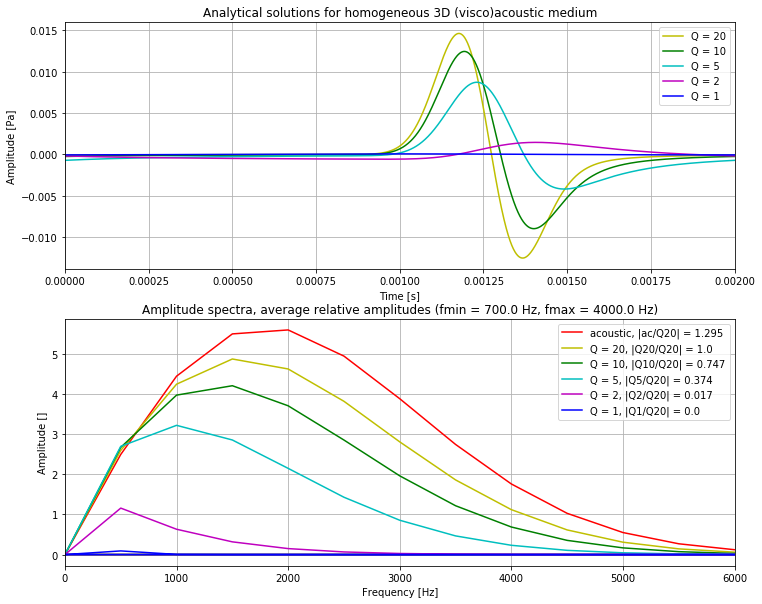

In [13]:
# Compare time domain seismograms and amplitude spectra
plt.figure(figsize=(12,10))

plt.subplot(211)

#plt.plot(time, G3td_seis, 'r-', label='acoustic solution')
plt.plot(time, Q20, 'y-', label='Q = 20')
plt.plot(time, Q10, 'g-', label='Q = 10')
plt.plot(time, Q5, 'c-', label='Q = 5')
plt.plot(time, Q2, 'm-', label='Q = 2')
plt.plot(time, Q1, 'b-', label='Q = 1')
plt.title("Analytical solutions for homogeneous 3D (visco)acoustic medium" )
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [Pa]")
plt.xlim((0, tmax))
plt.grid()
plt.legend()

plt.subplot(212)

plt.plot(freq, np.abs(G3fd_seis), 'r-', label='acoustic, |ac/Q20| = ' + str(arac))
plt.plot(freq, np.abs(Q20fd), 'y-', label='Q = 20, |Q20/Q20| = ' + str(arQ20))
plt.plot(freq, np.abs(Q10fd), 'g-', label='Q = 10, |Q10/Q20| = ' + str(arQ10))
plt.plot(freq, np.abs(Q5fd), 'c-', label='Q = 5, |Q5/Q20| = ' + str(arQ5))
plt.plot(freq, np.abs(Q2fd), 'm-', label='Q = 2, |Q2/Q20| = ' + str(arQ2))
plt.plot(freq, np.abs(Q1fd), 'b-', label='Q = 1, |Q1/Q20| = ' + str(arQ1))
plt.title('Amplitude spectra, average relative amplitudes (fmin = ' + str(fmin) + ' Hz, fmax = ' + str(fmax) + ' Hz)')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude []")
plt.xlim((0, 3.* f0))
plt.grid()
plt.legend()

# save figure
plt.savefig('Visco-acoustic_Green_3D_Q.pdf', bbox_inches='tight')

plt.show()

The comparison of the seismograms for the homogeneous acoustic and visco-acoustic media shows the significant damping of the amplitudes with decreasing $Q$ values. The amplitude spectra also show, that higher frequencies are stronger damped than lower frequencies.  